# Cálculo e clasificación de puntos críticos

Con todas as ferramentas que xa levamos revisado nas anteriores prácticas, o cálculo de puntos críticos e a súa clasificación mediante o criterio que involucra á matriz Hessiana de funcións de dúas variables diferenciables é moi sinxelo usando o módulo **Sympy**. No caso de puntos críticos basta calcular o gradiente da función e resolver un sistema de dúas ecuacións (habitualmente non lineal) e para a clasificación dos puntos críticos se deben inspeccionar os autovalores da matriz Hessiana (cálculo que tamén está dispoñible en **Sympy**).

Como aplicación do cálculo e identificación de máximos e mínimos relativos, revisaremos como interpretar como un problema de optimización o axuste polinomial mediante mínimos cadrados dun conxunto de puntos unidimensional.

### Obxectivos:

- Cálculo de puntos críticos
- Clasificación de puntos críticos: matriz Hessiana
- Problema de optimización: axuste polinomial mediante mínimos cadrados



## Cálculo de puntos críticos
Nesta práctica usaremos tanto o módulo **Sympy**, como tamén **Numpy** e **Matplotlib**. Así que debemos importalos para o resto do guión de prácticas:

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

Como xa aconteceu en prácticas anteriores, debemos facer unha implementación propia para calcular o gradiente dunha función escalar $f$. Para iso usaremos a relación que xa coñecemos entre a matriz Xacobiana $Df$ dunha función escalar e o vector (columna) gradiente $\nabla f$, isto é $\nabla f=Df^{t}$:

In [2]:
gradient = lambda f, v: sp.transpose(sp.Matrix([f]).jacobian(v))

Como xa estudamos nas sesións expositivas, que se supoñemos que a función de dúas variables $f$ é diferenciable, o cálculo de puntos críticos realízase tendo en conta que o plano tanxente á superficie que define a función son planos horizontais nos extremos relativos da función, é dicir, naqueles puntos onde as derivadas parciais de $f$ son nulas. Vexamos isto cun exemplo no que $f(x,y)=-x^3 +4xy-2y^2+1$:

In [3]:
x, y = sp.symbols('x y', real=True) # define as variables simbólicas x e y
f = sp.Lambda((x,y), -x**3 +4*x*y-2*y**2+1)

# Cálculo de puntos críticos
grad_f = gradient(f(x,y),(x,y))
sol = sp.solve((sp.Eq(grad_f[0],0),sp.Eq(grad_f[1],0)),(x,y))
display('Critical points for x and y:', sol)

'Critical points for x and y:'

[(0, 0), (4/3, 4/3)]

Para comprobar visualmente o tipo de puntos críticos que posúe esta función, a podemos representar gráficamente:

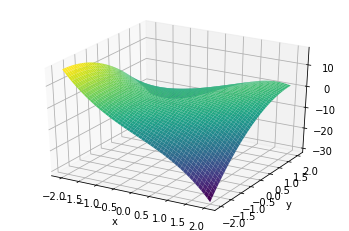

In [4]:
p = sp.plotting.plot3d(f(x,y), (x, -2, 2), (y, -2, 2), show=False)
p.xlabel='x'
p.ylabel='y'
p.zlabel='z'
p.show()

### **Exercicio 8.1** 
Calcula os puntos críticos e representa graficamente a función:
$$
f(x,y) =  \left(\frac12-x^2+y^2\right)e^{1-x^2-y^2}
$$ 
na rexión $(x,y)\in[-4,4]\times[-4,4]$.

In [5]:
# O TEU CÓDIGO AQUÍ

## Clasificación de puntos críticos: matriz Hessiana
O cálculo da matriz Hessiana co módulo **Sympy** é inmediato xa que basta usar o comando `sp.hessian`. Unha vez feito isto, para calcular os autovalores desta matriz e decidir atendendo aos seus valores sen os puntos críticos son máximos relativos, mínimos relativos ou puntos de sela, soamnete debemos empregar o método `eigenvals` que está accesible na clase de obxectos tipo `sp.Matrix`:

In [8]:
H = sp.Lambda((x,y), sp.hessian(f(x,y), (x,y)))
display('Hessian matrix', H(x,y))

# Clasificación do primeiro punto crítico: (0,0)
eigs = H(*sol[0]).eigenvals()
display('Eigenvalues for point (0,0)', np.double([*eigs]))

# Clasificación do segundo punto crítico: (4/3,4/3)
eigs = H(*sol[1]).eigenvals()
display('Eigenvalues for point (4/3,4/3)', np.double([*eigs]))

'Hessian matrix'

Matrix([
[-6*x,  4],
[   4, -4]])

'Eigenvalues for point (0,0)'

array([-6.47213595,  2.47213595])

'Eigenvalues for point (4/3,4/3)'

array([-10.47213595,  -1.52786405])

### **Exercicio 8.2** 
Clasifica os puntos críticos obtidos no exercicio 8.1, que correspondían á función:
$$
f(x,y) =  \left(\frac12-x^2+y^2\right)e^{1-x^2-y^2}
$$ 
na rexión $(x,y)\in[-4,4]\times[-4,4]$.

In [7]:
# O TEU CÓDIGO AQUÍ

## Axuste polinomial mediante mínimos cadrados
Dado un conxunto de puntos nun plano $(x_1,y_1), (x_2,y_2),\ldots, (x_{m},y_{m})$, é habitual que se trate atopar cal é o mellor polinomio de grao $N$ que minimiza o erro cadrático medio entre os datos proporcionados e os valores do polinomio axustado. No caso, dunh polinomio de grado $1$, o polinomio se escribe como $p(x)=ax+b$ e o anterior problema redúcese a atopar $(a^*,b^*)$ tal que se minimiza a función error:
$$
\mathrm{error}(a^*,b^*)=\min_{(a,b)\in\mathbb{R}^{2}}\mathrm{error}(a,b)
$$
onde 
$$
\mathrm{error}(a,b)=\sum_{i=1}^{m}(ax_i+b-y_i)^2.
$$
Como calquera outro problema de minimización sen restriccións, para a súa resolución se deben calcular os puntos críticos da función erro e despois comprobar que se trata dun mínimo relativo (que será absoluto xa que a función erro tende a infinito cando $a$ ou $b$ tenden a $\pm\infty$). Vexamos este cálculo cun exemplo concreto. En primeiro lugar introducimos os datos:

In [10]:
# Datos
xdata = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
ydata = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])

A continuación, definimos a función error, calculamos os puntos críticos e mediante a matriz Hessiana determinamos que se trata dun mínimo relativo.

In [11]:
# Erro a minimizar no método de mínimos cadrados
a, b = sp.symbols('a b', real=True)
error = sp.Lambda((a,b),sum((a*xi + b - yi)**2 for xi,yi in zip(xdata, ydata)))
display('Error function', error(a,b))

# Cálculo de puntos críticos
grad_error = gradient(error(a,b),(a,b))
sol = sp.solve((sp.Eq(grad_error[0],0),sp.Eq(grad_error[1],0)),(a,b))
display('Critical points for a and b:', sol)

# Clasificación de puntos críticos: autovalores da matriz Hessiana
H = sp.hessian(error(a,b), (a,b))
display('Hessian matrix', H)
eigs = H.eigenvals()
display('Eigenvalues', [*eigs])
display('Eigenvalues', np.double([*eigs]))

'Error function'

b**2 + (1.0*a + b - 0.8)**2 + (2.0*a + b - 0.9)**2 + (3.0*a + b - 0.1)**2 + (4.0*a + b + 0.8)**2 + (5.0*a + b + 1.0)**2

'Critical points for a and b:'

{a: -0.302857142857143, b: 0.757142857142857}

'Hessian matrix'

Matrix([
[110.0, 30.0],
[ 30.0,   12]])

'Eigenvalues'

[61 - sqrt(3301), sqrt(3301) + 61]

'Eigenvalues'

array([  3.54567031, 118.45432969])

Dado que o proceso de axuste polinomial de datos é unha tarefa moi recurrente, existen métodos numéricos dedicados ao seu cálculo (tanto nunha como en varias dimensións). En particular, o módulo **Numpy** tamén ten un ferramenta directa para facer este axuste co comando `np.polyfit`. Comprobemos que os coeficientes que calcula son os mesmos que se obteñen cos cálculos en **Sympy**:

In [12]:
# Axuste por mínimos cadrados dun polinomio de orde 1
z = np.polyfit(xdata, ydata, 1)
display('Values for a and b', z)

'Values for a and b'

array([-0.30285714,  0.75714286])

Adicionalmente, o comando `np.polyfit` permite facer o axuste usando un polinomo de calquera orde. No que segue, se calcula e representa graficamente o axuste polinomial de orde $3$:

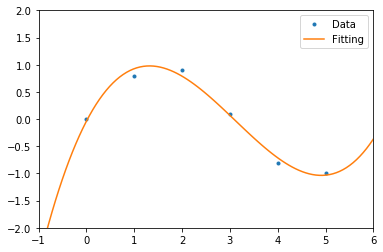

In [12]:
# Axuste por mínimos cadrados dun polinomio de orde 3
z = np.polyfit(xdata, ydata, 3)

# Define un polinomio en Sympy a partir dos seus coeficientes
x = sp.symbols('x', real=True) 
P = sp.Lambda(x,sum((a*x**i for i,a in enumerate(z[::-1]))))

# Representación gráfica 
pol = sp.lambdify(x,P(x),"numpy")
plt.plot(xdata, ydata, '.', label='Data')
xp = np.linspace(-1.,6.,100)
plt.plot(xp, pol(xp), '-', label='Fitting')
plt.xlim(-1,6)
plt.ylim(-2,2)
plt.legend()
plt.show()

### **Exercicio 8.3** 
Sobre os datos usados anteriormente, sábese que no punto $x=4.5$, o valor é $-1.01$. Usa diferente orde de polinomios para axustar os datos, por exemplo $N=3, 5, 10, 20, 30$. Calcula o erro que se comete neste axuste no punto $x=4.5$:
- Ao aumentar a orde polinomial, mellorase o erro?
- Cal é o valor de $N$ co que se comete menor erro no axuste para o punto $x=4.5$?
- Ao introducir o novo dato do punto $x=4.5$ e usar $N<4$: apreciase algunha diferencia na curva axustada?

In [14]:
# O TEU CÓDIGO AQUÍ